<a href="https://colab.research.google.com/github/mona-jha/Machine-Learning-II/blob/main/problem_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


<h1><b>Assignmen-1(ML2)<b>
<h2> Name : Mona Kumari <br>
Roll No. :<b> CS2311</b>



---



 **Problems on Variational Auto-Encoder**

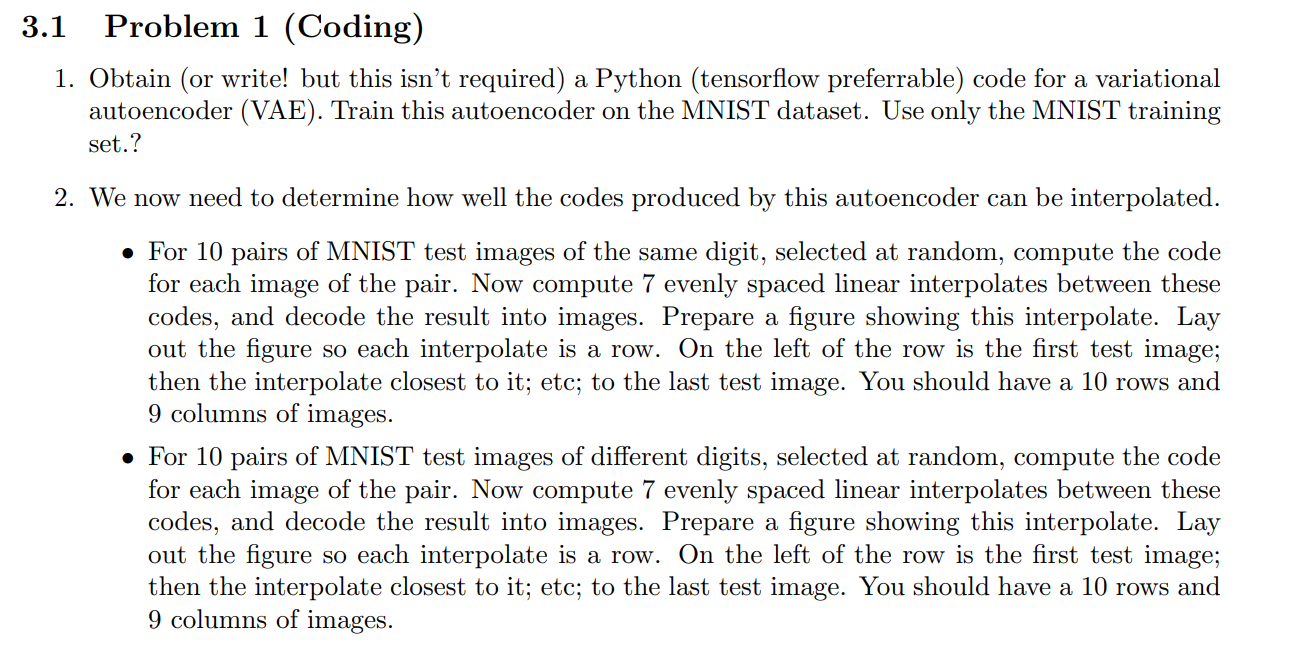

## Solution

In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,UpSampling2D
from keras import Input, Model
from keras import backend as k
from keras.layers import Lambda
from tensorflow.keras.metrics import binary_crossentropy

from IPython.display import SVG

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

11490434/11490434 [==============================] - 0s 0us/step
(60000, 784)
(10000, 784)


In [ ]:
batch_size, n_epoch = 100, 150
latent_dim = 2

input_img = Input(shape=(x_train[0].shape))
x = Dense(200, activation='relu')(input_img)
x= Dense(100, activation='relu')(x)
x = Dense(30, activation='relu')(x)

mu = Dense(latent_dim)(x)
log_var = Dense(latent_dim)(x)

encoder = Model(input_img, mu, name='Encoder')
encoder.summary()

Model: "Encoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 200)               157000    
                                                                 
 dense_1 (Dense)             (None, 100)               20100     
                                                                 
 dense_2 (Dense)             (None, 30)                3030      
                                                                 
 dense_3 (Dense)             (None, 2)                 62        
                                                                 
Total params: 180192 (703.88 KB)
Trainable params: 180192 (703.88 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
def sampling(args):
    mu, log_var = args
    eps = k.random_normal(shape=(batch_size, latent_dim), mean=0., stddev=1.0)
    return mu + k.exp(log_var) * eps

z = Lambda(sampling, output_shape=(latent_dim,))([mu, log_var])

In [ ]:
z_decoder1 = Dense(30, activation='relu')
z_decoder2 = Dense(100, activation='relu')
z_decoder3 = Dense(200, activation='relu')
y_decoder = Dense((x_train[0].shape[0]), activation='sigmoid')

z_decoded = z_decoder1(z)
z_decoded = z_decoder2(z_decoded)
z_decoded = z_decoder3(z_decoded)
y = y_decoder(z_decoded)

In [ ]:
reconstruction_loss = binary_crossentropy(input_img, y) * x_train[0].shape
kl_loss = 0.5 * k.sum(k.square(mu) + k.exp(log_var) - log_var - 1, axis = -1)
vae_loss = reconstruction_loss + kl_loss

vae = Model(input_img, y)
vae.add_loss(vae_loss)

vae.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 784)]                0         []                            
                                                                                                  
 dense (Dense)               (None, 200)                  157000    ['input_1[0][0]']             
                                                                                                  
 dense_1 (Dense)             (None, 100)                  20100     ['dense[0][0]']               
                                                                                                  
 dense_2 (Dense)             (None, 30)                   3030      ['dense_1[0][0]']             
                                                                                              

In [ ]:
vae.compile(optimizer='rmsprop')
history = vae.fit(x_train, shuffle=True, epochs=n_epoch, batch_size=batch_size, validation_data=(x_test, None), verbose=1)

Epoch 1/150
600/600 [==============================] - 9s 14ms/step - loss: 201.2959 - val_loss: 179.9401
Epoch 2/150
600/600 [==============================] - 11s 18ms/step - loss: 169.2903 - val_loss: 164.7516
Epoch 3/150
600/600 [==============================] - 7s 12ms/step - loss: 158.6829 - val_loss: 155.1445
Epoch 4/150
600/600 [==============================] - 8s 13ms/step - loss: 152.8359 - val_loss: 150.7210
Epoch 5/150
600/600 [==============================] - 8s 14ms/step - loss: 148.7653 - val_loss: 147.5371
Epoch 6/150
600/600 [==============================] - 7s 12ms/step - loss: 146.1788 - val_loss: 145.5753
Epoch 7/150
600/600 [==============================] - 8s 14ms/step - loss: 144.4698 - val_loss: 144.8551
Epoch 8/150
600/600 [==============================] - 7s 11ms/step - loss: 143.3146 - val_loss: 142.8154
Epoch 9/150
600/600 [==============================] - 8s 13ms/step - loss: 142.1780 - val_loss: 142.7398
Epoch 10/150
600/600 [=======================

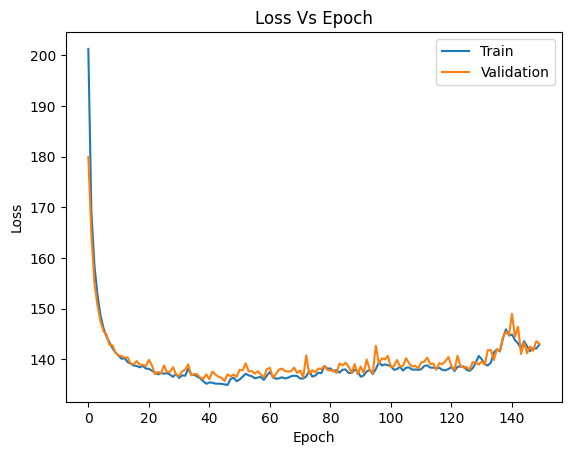

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Vs Epoch')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])
plt.show()

40/40 [==============================] - 0s 4ms/step


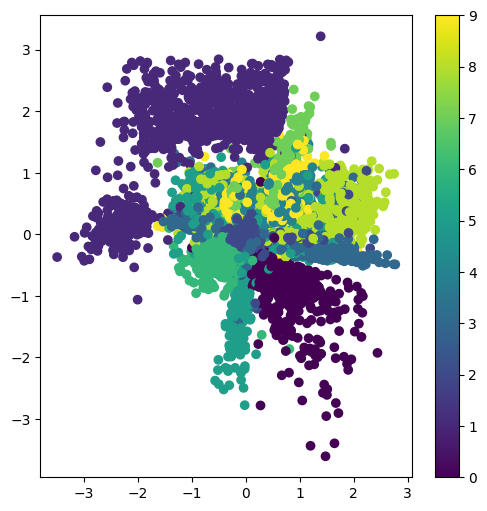

In [ ]:
x_te_latent = encoder.predict(x_test, batch_size=256)
plt.figure(figsize=(6, 6))
plt.scatter(x_te_latent[:, 0], x_te_latent[:, 1], c=y_test)
plt.colorbar()
plt.show()

In [ ]:
decoded_img = vae.predict(x_test, batch_size=batch_size)

100/100 [==============================] - 1s 4ms/step


Orignal Image:


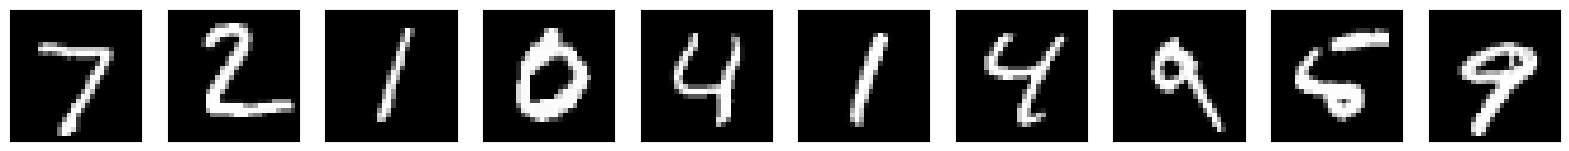

Reconstructed Image:


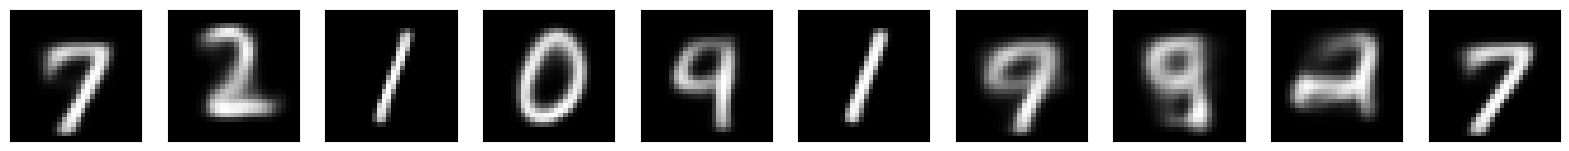

In [ ]:
n = 10

print('Orignal Image:')
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


print('Reconstructed Image:')
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_img[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:
decoder_input = Input(shape=(latent_dim,))
_z_decoded = z_decoder1(decoder_input)
_z_decoded = z_decoder2(_z_decoded)
_z_decoded = z_decoder3(_z_decoded)
_y = y_decoder(_z_decoded)
generator = Model(decoder_input, _y, name='Decoder')
generator.summary()

Model: "Decoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 2)]               0         
                                                                 
 dense_5 (Dense)             multiple                  90        
                                                                 
 dense_6 (Dense)             multiple                  3100      
                                                                 
 dense_7 (Dense)             multiple                  20200     
                                                                 
 dense_8 (Dense)             multiple                  157584    
                                                                 
Total params: 180974 (706.93 KB)
Trainable params: 180974 (706.93 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
from scipy.stats import norm

n = 15
digit_size = 28
figure = np.zeros((digit_size * n, digit_size * n))

grid_x = norm.ppf(np.linspace(0.05, 0.95, n))
grid_y = norm.ppf(np.linspace(0.05, 0.95, n))

for i, yi in enumerate(grid_x):
    for j, xi in enumerate(grid_y):
        z_sample = np.array([[xi, yi]])
        x_decoded = generator.predict(z_sample)
        digit = x_decoded[0].reshape(digit_size, digit_size)
        figure[i * digit_size: (i + 1) * digit_size,
               j * digit_size: (j + 1) * digit_size] = digit



In [ ]:
plt.figure(figsize=(10, 10))
plt.imshow(figure, cmap='Greys_r')
plt.show()